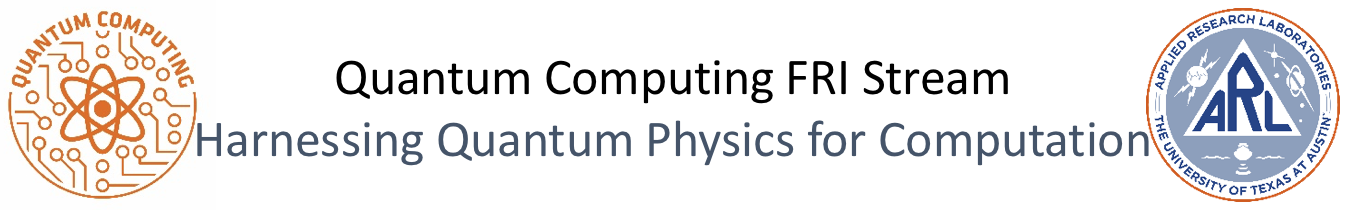

#### Most Recent Lesson: Lesson04 - Programming Qiskit

### Installations and Imports

In [2]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet

     |████████████████████████████████| 6.7 MB 3.2 MB/s 
     |████████████████████████████████| 19.2 MB 1.2 MB/s 
     |████████████████████████████████| 240 kB 56.3 MB/s 
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 112 kB 57.5 MB/s 
     |████████████████████████████████| 37.5 MB 1.1 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 943 kB 59.4 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 4.0 MB 37.1 MB/s 
     |████████████████████████████████| 1.9 MB 36.9 MB/s 
     |████████████████████████████████| 112 kB 64.5 MB/s 


In [3]:
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

     |████████████████████████████████| 162 kB 5.2 MB/s 


In [9]:
#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.visualization import plot_state_city
from qiskit.visualization.state_visualization import plot_bloch_multivector

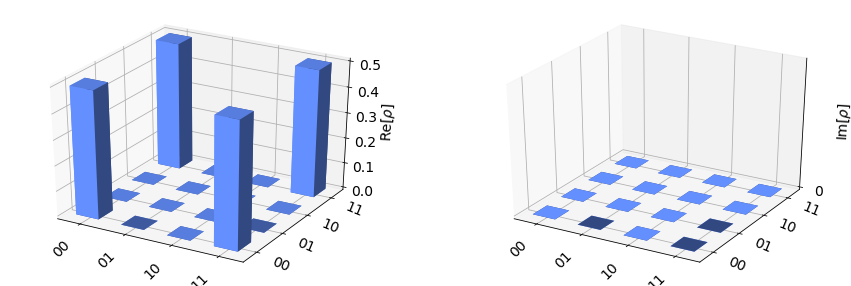

In [71]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
vec = Statevector.from_label('00')
vec = vec.evolve(qc)
plot_state_city(vec)

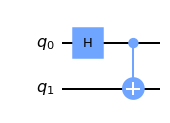

In [72]:
qc.draw('mpl')

In [83]:
from qiskit.quantum_info.states.random import random_statevector


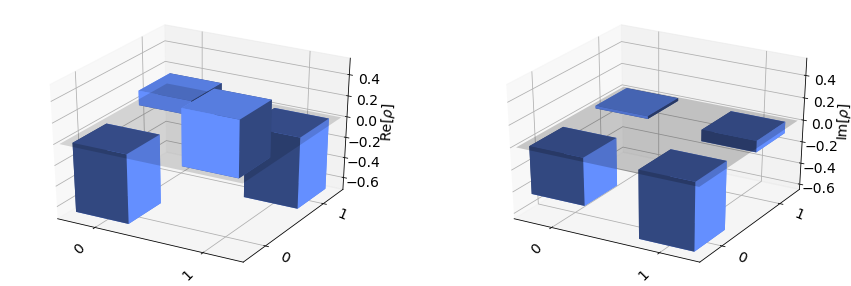

In [82]:
from qiskit.quantum_info.states.measures import partial_trace
from qiskit.visualization.utils import DensityMatrix
d = DensityMatrix(vec)
p = partial_trace(d,[1])
#plot_bloch_multivector(p.data)
plot_state_city(p.data)

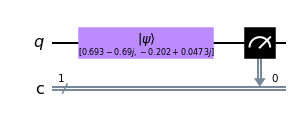

In [96]:
vec = random_statevector(2)
qc = QuantumCircuit(1,1)
qc.initialize(vec, 0)
qc.measure(0,0)
qc.draw('mpl')

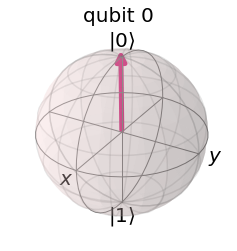

In [97]:
plot_bloch_multivector(vec.data)

{'1': 51, '0': 973}


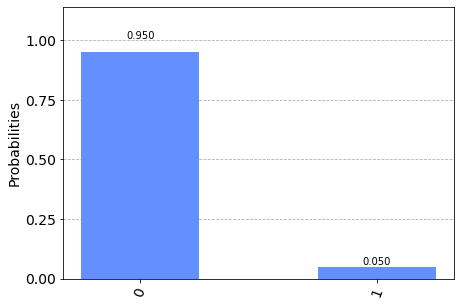

In [98]:
counts = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots=1024).result().get_counts(qc)
print(counts)
plot_histogram(counts)

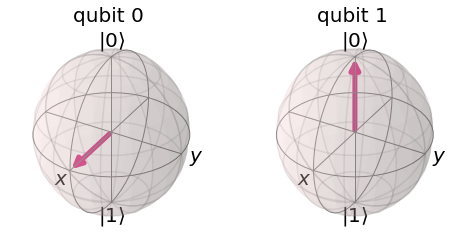

In [106]:
test = QuantumCircuit(2,1)
test.h(0)
vec = Statevector.from_label('00')
plot_bloch_multivector(vec.evolve(test))

# <font color=green>Homework</font>

$\text{Write a Python function to implement a controlled }\mathbf{X}\text{ gate with }n\text{ controlling qubits.}$

$\text{Start by recursively implementing an }n\text{-controlled }\mathbf{Z}^{a}.$

$\text{A contolled }\mathbf{Z}^{a}\text{ gate can be written as a more general controlled unitary.}$

$$\mathbf{C}^{\mathbf{Z}^{a}}_{ij}=\mathbf{C}^{\mathbf{U}(0,0,a\pi)}_{ij}$$

$\text{Follow the pattern of controlled controlled... gates from Lesson04.}$

$$\mathbf{C}^{\mathbf{Z}^{a}}_{i_{0}\dots i_{n-1}j}=\mathbf{C}^{\mathbf{Z}^{a/2}}_{i_{0}\dots i_{n-2}j} \mathbf{C}_{i_{0}\dots i_{n-2}i_{n-1}} \mathbf{C}^{\mathbf{Z}^{-a/2}}_{i_{n-1}j} \mathbf{C}_{i_{0}\dots i_{n-2}i_{n-1}} \mathbf{C}^{\mathbf{Z}^{a/2}}_{i_{n-1}j}$$





$\text{And note that a controlled }\mathbf{Z}\text{ gate is converted to a controlled }\mathbf{X}\text{ gate by the addition of }\mathbf{H}\text{ gates.}$

$$\mathbf{C}_{i_{0}\dots i_{n-1} j} = \mathbf{H}_{j} \mathbf{C}^{\mathbf{Z}}_{i_{0}\dots i_{n-1} j} \mathbf{H}_{j}$$

In [ ]:
#Change this n value and run all cells
n = 4 #number of controlling qubits
sv = '0'
for i in range(n):
  sv += '1'

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]


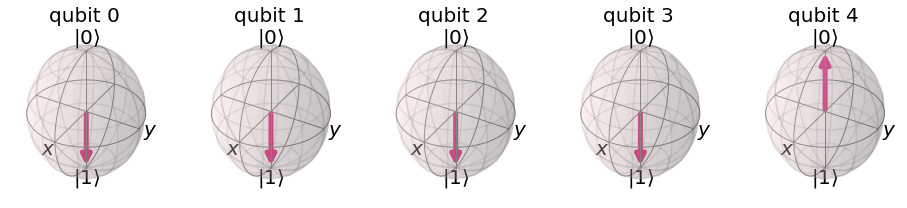

In [ ]:
from qiskit.visualization.state_visualization import plot_bloch_multivector
v011=Statevector.from_label(sv)
print(v011.data)
plot_bloch_multivector(v011.data)

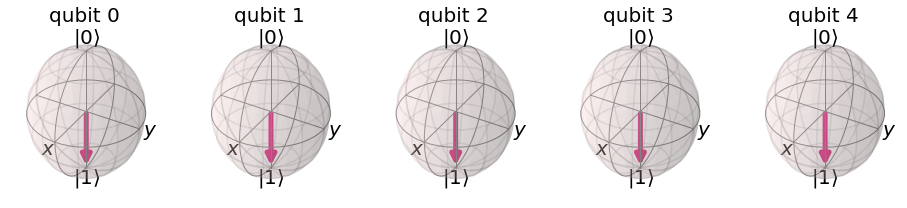

In [ ]:
#What should happen
qc = QuantumCircuit(n+1)
qc.x(n)
vec = v011.evolve(qc)
plot_bloch_multivector(vec.data)

In [ ]:
qc = QuantumCircuit(n+1)
ci = QuantumCircuit(n+1) #circuit initial
cf = QuantumCircuit(n+1) #circuit final

 
#Start circuit
qc.h(n)
qc.barrier()

#Control S Gate
qc.tdg(n)
qc.cx(n-1,n)
qc.t(n)
qc.s(n)
qc.cx(n-1,n)
qc.s(n)
qc.t(n-1)
qc.barrier()

#CZ Gate
cf.cu(0,0,np.pi,0,0,1)
for i in range(n-2):
  
  #initial gate
  ci.tdg(2+i)
  ci.cx(1+i,2+i)
  ci.t(2+i)
  ci.sdg(2+i)
  ci.cx(1+i,2+i)
  ci.s(2+i)
  ci.t(1+i)
  ci.barrier()

  ci.h(1+i)
  qc.barrier()
  ci.compose(cf, inplace = True)
  qc.barrier()
  ci.h(1+i)
  ci.barrier()

  ci.t(1+i)
  ci.s(2+i)
  ci.cx(1+i,2+i)
  ci.sdg(2+i)
  ci.t(2+i)
  ci.cx(1+i,2+i)
  ci.tdg(2+i)
  ci.barrier()


  ci.h(1+i)
  qc.barrier()
  ci.compose(cf, inplace = True)
  qc.barrier()
  ci.h(1+i)
  ci.barrier()

  ci.tdg(2+i)
  ci.cx(i,2+i)
  ci.t(2+i)
  ci.sdg(2+i)
  ci.cx(i,2+i)
  ci.s(2+i)
  ci.t(i)
  ci.barrier()

  cf.clear()
  cf.compose(ci, inplace = True)
  ci.clear() 

#Nth Control Gate
qc.h(n)
qc.barrier()
qc.compose(cf, inplace=True)
qc.barrier()
qc.h(n)
qc.barrier()

#Control S Dagger
qc.t(n-1)
qc.s(n)
qc.cx(n-1,n)
qc.s(n)
qc.t(n)
qc.cx(n-1,n)
qc.tdg(n)
qc.barrier()

#Control Gate
qc.h(n)
qc.barrier()
qc.compose(cf, inplace=True)
qc.barrier()
qc.h(n)
qc.barrier()

#Unitary
qc.compose(cf, inplace=True)
qc.barrier()

qc.h(n)


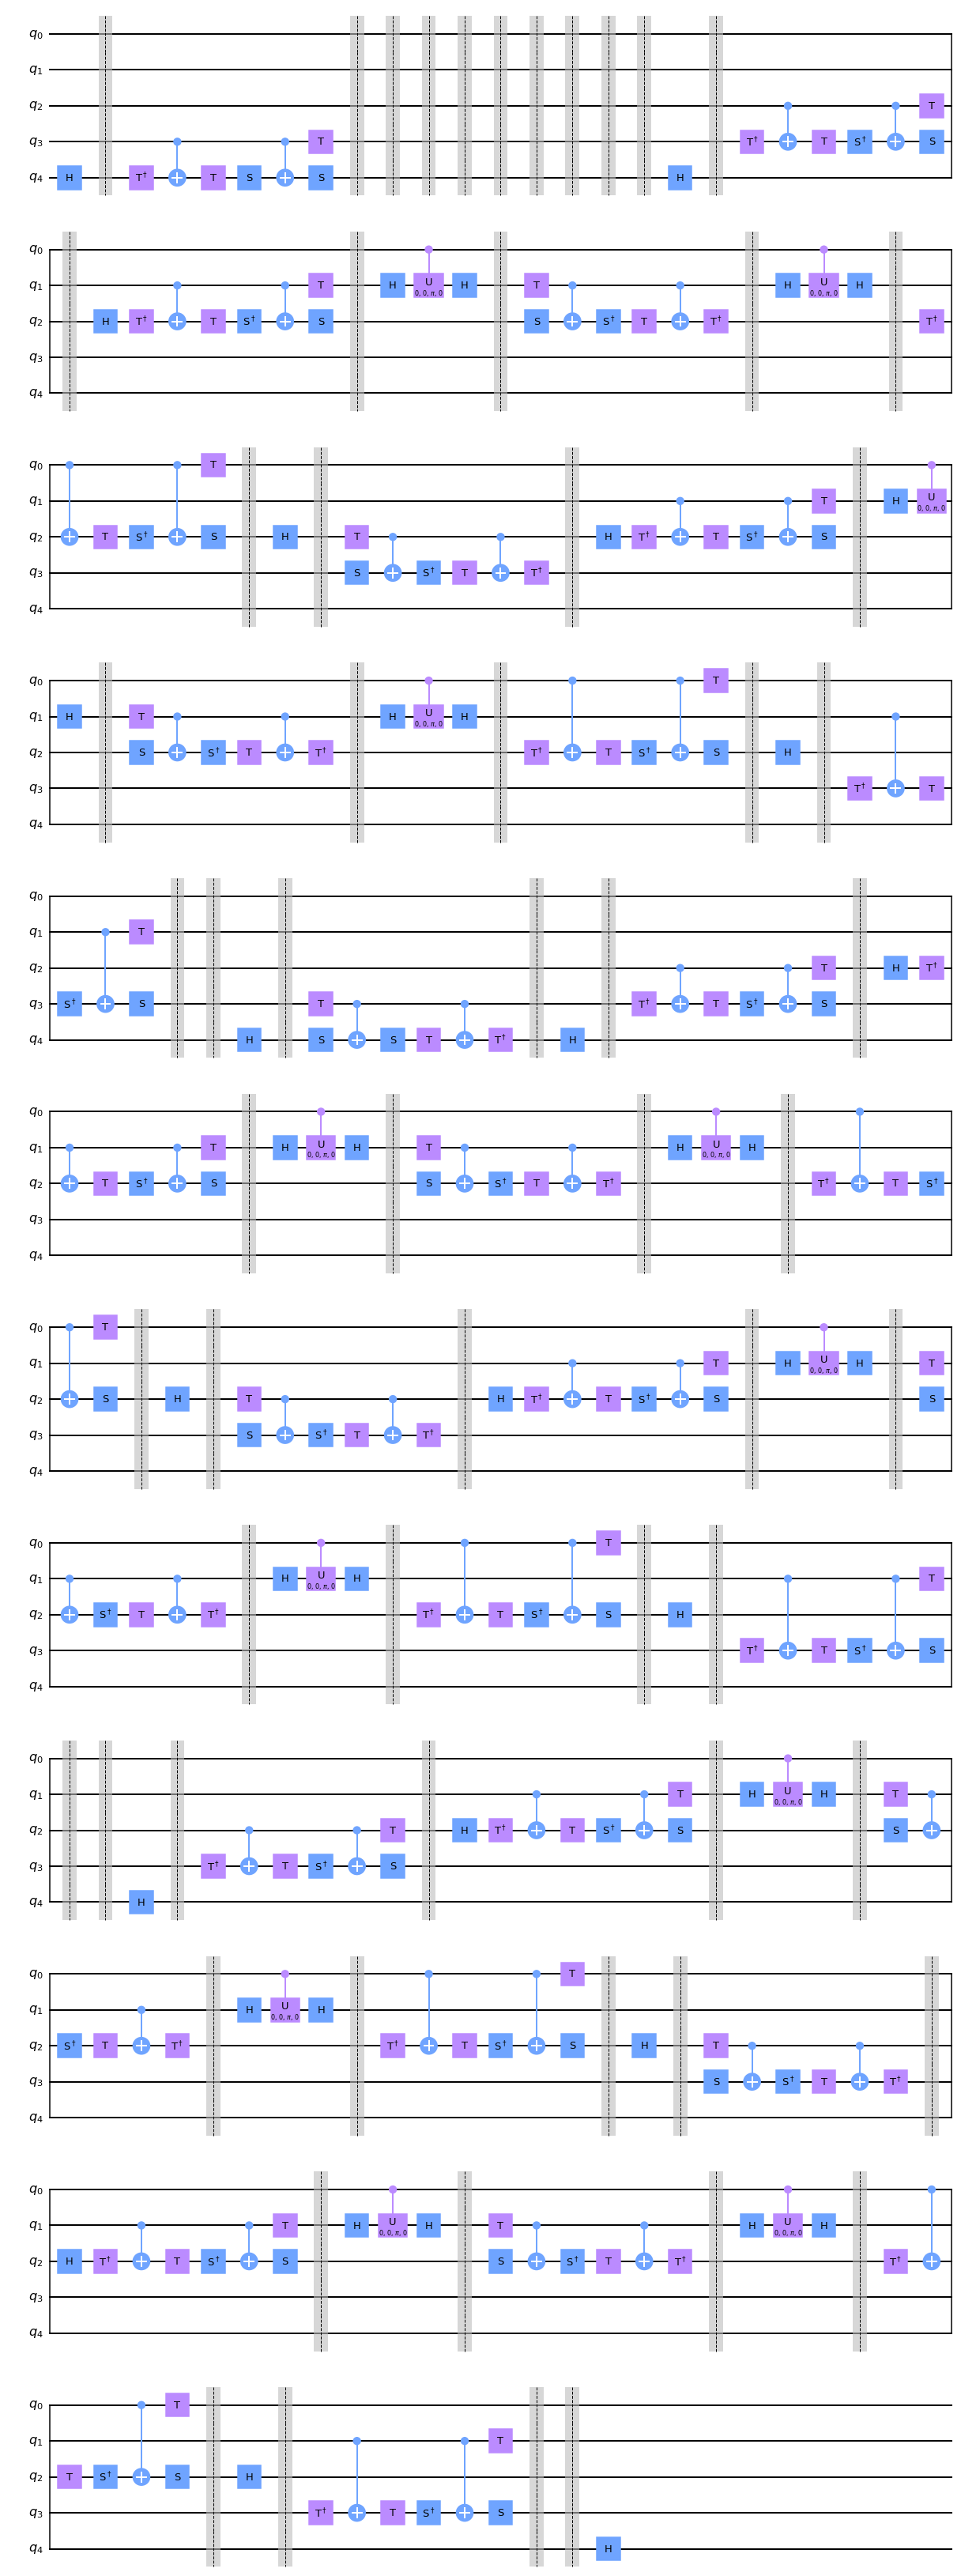

In [ ]:
qc.draw('mpl')

[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  4.81855651e-34-1.26497978e-33j
  0.00000000e+00+0.00000000e+00j -7.26421297e-33+1.18651338e-32j
  0.00000000e+00+0.00000000e+00j  4.11123418e-33-1.09019785e-33j
  0.00000000e+00+0.00000000e+00j  5.91405435e-18+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j -2.06389369e-17+7.65320949e-17j
  0.00000000e+00+0.00000000e+00j -3.30079082e-16-3.88578059e-16j
  0.00000000e+00+0.00000000e+00j -1.73510261e-16+1.03135720e-16j
  0.00000000e+00+0.000000

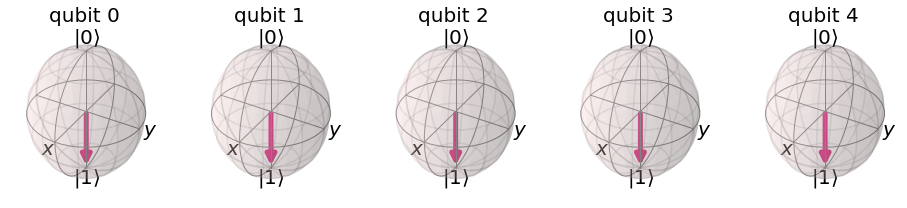

In [ ]:
#Result
vec=v011.evolve(qc)
print(vec.data)
plot_bloch_multivector(vec.data)

In [ ]:
control = QuantumRegister(n)
target = QuantumRegister(1)
c = ClassicalRegister(1)
test = QuantumCircuit(control, target, c)

test.h(control)
test.barrier()

test.compose(qc, inplace=True)
test.barrier()

test.measure(n-1, c)

In [ ]:
backend = Aer.get_backend('qasm_simulator')

In [ ]:
job = execute(test, backend, shots=1024)
result = job.result()
counts=result.get_counts(test)
print(counts)

{'0': 519, '1': 505}


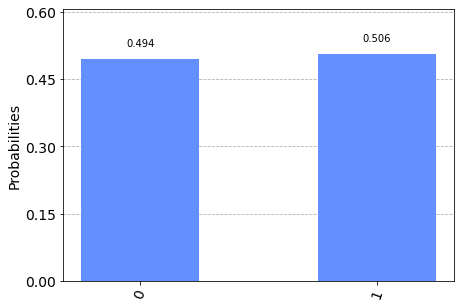

In [ ]:
plot_histogram(counts)

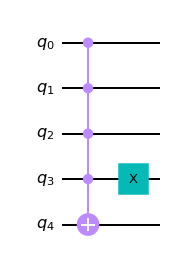

In [ ]:
comp = QuantumCircuit(n+1)


comp.mcx([0,1,2,3], [4], mode = 'noancilla')
comp.x(3)
comp.draw('mpl')


[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]


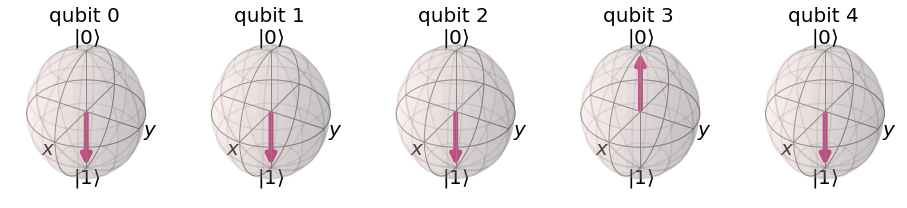

In [ ]:
vec22=v011.evolve(comp)
print(vec22.data)
plot_bloch_multivector(vec22.data)